In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
df = pd.read_csv("dataset/V3_PlatteRiverWeir_features_merged_all.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,...,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma,RiverArea,RiverWidth
0,0,0,2012-06-09 13:15:00,2012-06-09T13:09:07,StateLineWeir_20120609_Farrell_001.jpg,USGS,6674500,MDT,2.99,916.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49975.0,210.634704
1,1,1,2012-06-09 13:15:00,2012-06-09T13:10:29,StateLineWeir_20120609_Farrell_002.jpg,USGS,6674500,MDT,2.99,916.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50184.0,211.524335
2,2,2,2012-06-09 13:45:00,2012-06-09T13:44:01,StateLineWeir_20120609_Farrell_003.jpg,USGS,6674500,MDT,2.96,873.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50543.0,212.155422
3,3,3,2012-06-09 14:45:00,2012-06-09T14:44:30,StateLineWeir_20120609_Farrell_004.jpg,USGS,6674500,MDT,2.94,846.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50856.0,214.025223
4,4,4,2012-06-09 15:45:00,2012-06-09T15:44:59,StateLineWeir_20120609_Farrell_005.jpg,USGS,6674500,MDT,2.94,846.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51004.0,213.582583


In [3]:
df['SensorTime'] = pd.to_datetime(df['SensorTime'])
df['CaptureTime'] = pd.to_datetime(df['CaptureTime'])

In [4]:
df["Month"] = df['CaptureTime'].dt.month

### Get area, time and the values we want to predict

In [5]:
df_m = df[["Stage", "Discharge", "Month", "RiverArea", "RiverWidth"]]
df_m

,Stage,Discharge,Month,RiverArea,RiverWidth
0,2.99,916.0,6,49975.0,210.634704
1,2.99,916.0,6,50184.0,211.524335
2,2.96,873.0,6,50543.0,212.155422
3,2.94,846.0,6,50856.0,214.025223
4,2.94,846.0,6,51004.0,213.582583
...,...,...,...,...,...
42054,2.54,434.0,10,45842.0,202.106496
42055,2.54,434.0,10,42300.0,203.093370
42056,2.54,434.0,10,41080.0,204.104631
42057,2.54,434.0,10,40976.0,201.839450


In [6]:
df_m.describe()

,Stage,Discharge,Month,RiverArea,RiverWidth
count,42059.000000,42059.000000,42059.000000,23903.000000,23903.000000
mean,2.878743,970.956439,6.590432,40137.570723,191.270200
std,0.805533,1192.272290,3.143760,5370.402596,17.495976
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.280000,213.000000,4.000000,38554.500000,187.462261
50%,2.550000,388.000000,7.000000,40315.000000,193.273395
75%,3.290000,1350.000000,9.000000,42397.000000,197.976688
max,6.490000,7920.000000,12.000000,73507.000000,239.164486


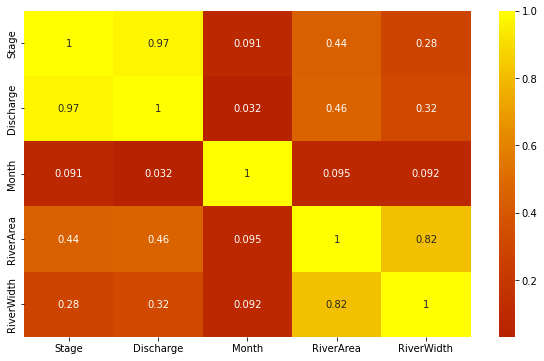

In [7]:
corr_pearson = df_m.corr() # pearson correlation

# generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_pearson, annot=True, center=0, cmap='gnuplot')
plt.show()

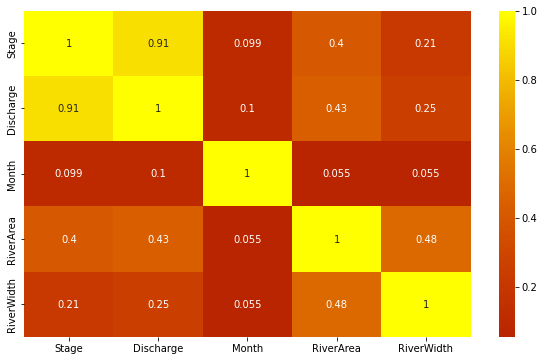

In [8]:
corr_ken = df_m.corr(method="kendall") # kendall correlation

# generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_ken, annot=True, center=0, cmap='gnuplot')
plt.show()

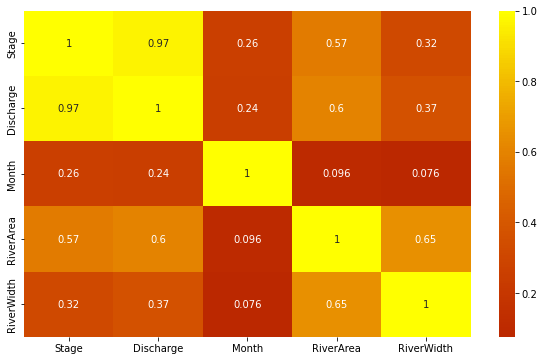

In [9]:
corr_spearman = df_m.corr(method="spearman") # spearman correlation

# generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_spearman, annot=True, center=0, cmap='gnuplot')
plt.show()